# Trabalho de Modelos Matemáticos Aplicados a Engenharia Elétrica II

## Parte II

## Aluno: Renan Larrieu de Abreu Mourão

## Matrícula: 201810061211

## E-mail: renanlarrieu@gmail.com e renan.201810061211@eng.uerj.br

## Prof: Andrei Battistel

- Para a realização deste trabalho, escolheu-se a classe de estabilidade de um sistema.

------

# <center>Introdução<center>

####  A estabilidade de um sistema pode ser definida se para todo sinal aplicado de amplitude limitada em sua entrada tenha-se um sinal de saída também limitado. Dessa forma, a análise de estabilidade não está restrita ao campo da engenharia elétrica, nos mais variados circuitos elétrico ou eletrônicos, mas, também a sistemas mecânicos de rotação, translação, engrenagens, fluidos, entre muitos outros.

#### Baseado no que foi exposto, expõe-se que as classificações podem receber outros nomes além de "instável" ou "estável". Nesse sentido, sabe-se que um sistema estável pode ser classificado como BIBO, isto é, Bounded Input Bounded Output, que define que a entrada "obedece" a saída.

#### Posto isso, neste trabalho aborda-se o caso de um sistema eletromecânico - Motor CC - muito comum em sistemas conversão eletromecânica de energia, e que conta com diversas aplicações em Alta/Baixa tensão. Nesse sentido, ao longo deste relatório, que foi baseado no [sistema modelado](https://www.google.com.br/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwiQr-Gqj7PwAhXbqJUCHbZGAXgQFjABegQIBRAD&url=http%3A%2F%2Fpaginapessoal.utfpr.edu.br%2Fcamaral%2Flaboraorio-de-sistemas-de-controle%2F5_2%2520-%2520Funcoes%2520de%2520Transferencia.pdf%2Fat_download%2Ffile&usg=AOvVaw0Het5Zvh6H5rFUv5VfK_gS) por um professor da disciplina Sistemas de Controle da UTFPR, serão evidenciados alguns parâmetros físicos importantes e também serão exploradas as respostas do sistema modelado para determinadas entradas.

# <center>Modelo<center>

#### O sistema se trata de um servomotor CC controlado pela armadura, bem como mostra a figura abaixo. 

![desenho1.png](desenho1.png)

#### Dessa forma, o campo magnético num motor CC pode ser produzido essencialmente de duas formas:

#### 1. Imãs permanentes estacionários;
#### 2. Eletroimã estacionário.

#### Além disso, o circuito rotativo é chamado de armadura do motor, o qual tem resistência definida por $R_{a}$

#### Evidencia-se que a corrente $i_{a}$ circula pela armadura e corta o campo magnético que atravessa o sistema de tal forma que gera-se uma força magnética de intensidade proporcional ao comprimento do condutor, da intensidade da corrente $i_{a}$ e do campo magnético $|B|$ aplicado.

#### Com isso, a força magnética cria um torque no rotor, que inicialmente está parado, fazendo com que este começa a rotacionar a partir de uma velocidade angular $\omega _{m}$, onde

### $$\omega _{m}(t)=\frac{d\theta _{m}(t)}{dt}$$

![motor-cc.gif](motor-cc.gif)

#### Por ação e reação, gera-se uma força eletromotriz contrária à força induzida pela passagem da corrente no campo magnético, e esta pode ser calculada a partir

###  $$v _{b}(t)=K_{b}\frac{d\theta _{m}(t)}{dt}$$

#### A partir da equação acima, aplica-se a transformada de laplace considerando-se as condições inicias nulas, e usa-se este resultado para modelar a malha do circuito de armadura. Dessa forma, escreve-se a corrente de armadura em função do torque produzido pelo motor e analisa-se as equações de movimento de um motor, de modo a chegar na seguinte função de transferência de energia do sistema eletromecânico abaixo.

### $$H(s)=\frac{\theta _{m} (s)}{E_{a}(s)}=\frac{\frac{K_{t}}{R_{a}J_{m}}}{s\left[s+\frac{1}{J_{m}}{\left(D_{m}+\frac{K_{t}K_{b}}{R_{a}}\right)}\right]}$$

#### A partir da função de transferência definida pela relação entre a posição do rotor e a tensão de entrada no circuito da armadura, elabora-se simulação numérica com os parâmetros contidos na imagem descrita anteriormente para visualizar a resposta do sistema a diferentes tipos de entradas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import control as co
plt.rcParams['figure.figsize'] = [23,10]
plt.rcParams['font.size'] = 24

In [2]:
Kb=2 #constante elétrica
Tbloq=500 #torque de partida do rotor bloqueado
ea=100
Ra=ea 
Kt=Tbloq #constante elétrica
Jm=12
Dm=10

In [3]:
H=co.tf([0,Kt/(Ra*Jm)],[1,(1/Jm)*(Dm+Kt*Kb/Ra),0])

In [4]:
H

TransferFunction(array([0.41666667]), array([1.        , 1.66666667, 0.        ]))

Analisando o polo da função de transferência abaixo, pode-se fazer algumas afirmações sobre a estabilidade do sistema

### $$H(s)=\frac{\theta _{m} (s)}{E_{a}(s)}=\frac{0.4167}{s^2+1.667s}$$

Observa-se que o polo, apesar de ser um polinômio quadrático, tem um de seus coeficientes nulos, que fere um dos requisitos para o sistema ser estável. Portanto, tal condição é suficiente para classificar o sistema como instável. Além disso, evidencia-se que tal prova pode ser feita a partir do critério de Hurwitz, que neste exemplo, tem sua aplicação de forma bem trivial.

[Fonte](https://edisciplinas.usp.br/pluginfile.php/4183183/mod_resource/content/1/Aula2V2017.pdf)

Ainda assim, analisar-se-á as raízes do polo para colocá-las no plano complexo.

### $$s=\frac{-1.667 \pm\sqrt{1.667^{2}-4.1.0}}{2}$$

Portanto as raízes do Polo são:

### $$s_{1}=-1.667$$

### $$s_{2}=0$$

Com isso, plota-se as raízes no plano complexo, em que o eixo vertical é o eixo imaginário e o eixo real é o horizontal.

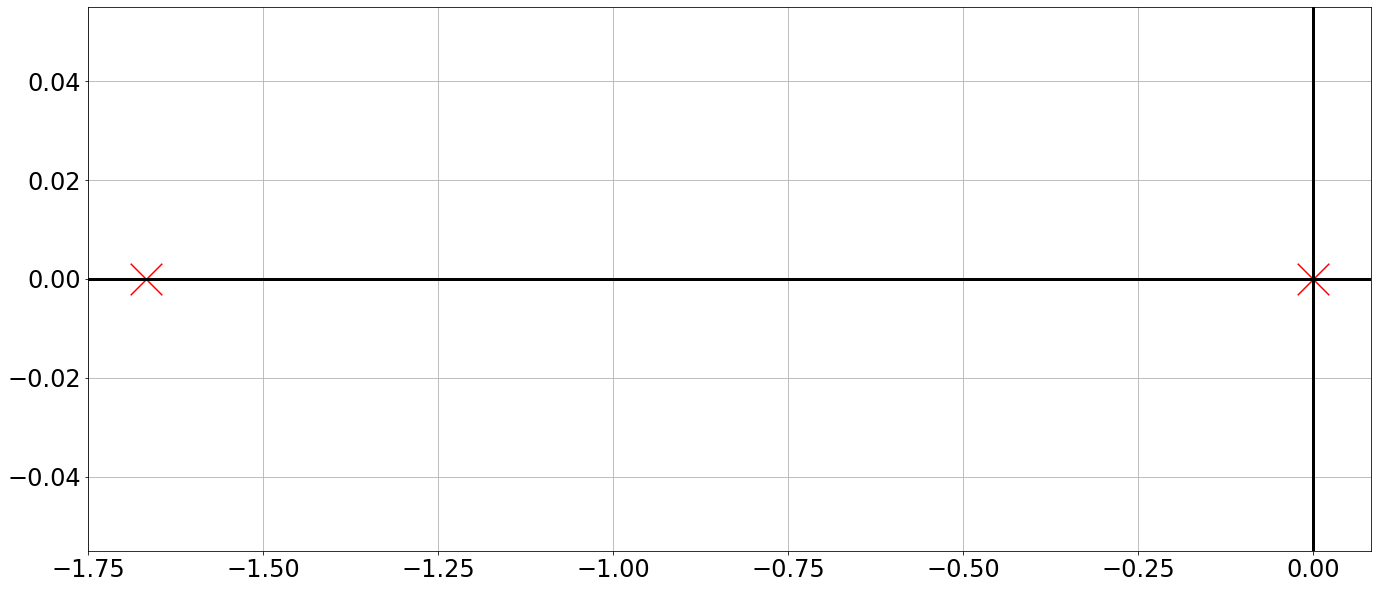

In [5]:
plt.axhline(y=0,linewidth=3.,color='black')
plt.axvline(x=0,linewidth=3.,color='black')
plt.scatter(-1.667,0,s=1000,color='r',marker='x')
plt.scatter(0,0,s=1000,color='r',marker='x')
plt.grid(True)

In [7]:
import sympy as sym
from sympy.abc import s,t
import numpy as np

In [8]:
transfer_func=0.4167/(s**2+1.667*s)

In [9]:
Hs=sym.inverse_laplace_transform(transfer_func,s,t)

In [10]:
Hs

0.2499700059988*Heaviside(t) - 0.2499700059988*exp(-1.667*t)*Heaviside(t)

Ao fazer a transformada de Laplace inversa, tem-se, portanto

###  $$f(t) = 0.25 \theta(t)-0.25e^{-1.677t}\theta(t)$$

------

## <center>Respostas do sistema<center>

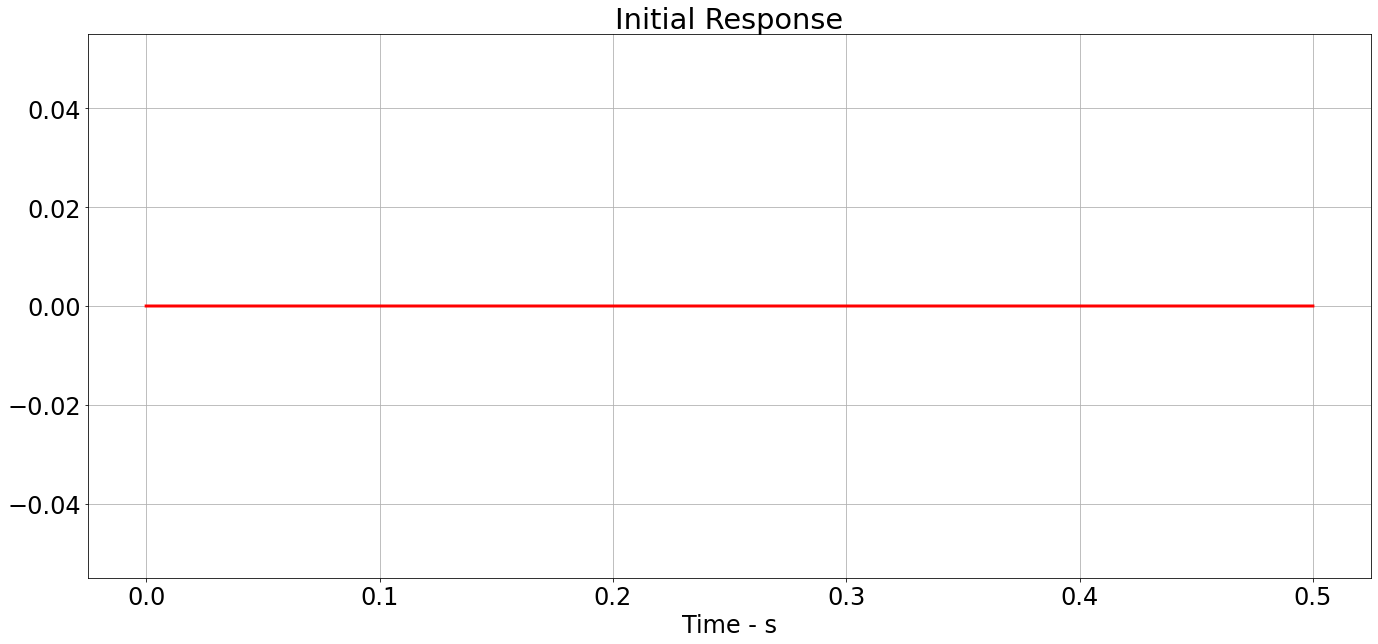

In [11]:
t = np.linspace(0, 0.5, 10000)  
t2,y2 = co.initial_response(H,t)
plt.title("Initial Response")
plt.xlabel('Time - s')
plt.plot(t2,y2,color='r',linewidth=3.)
plt.grid(True)

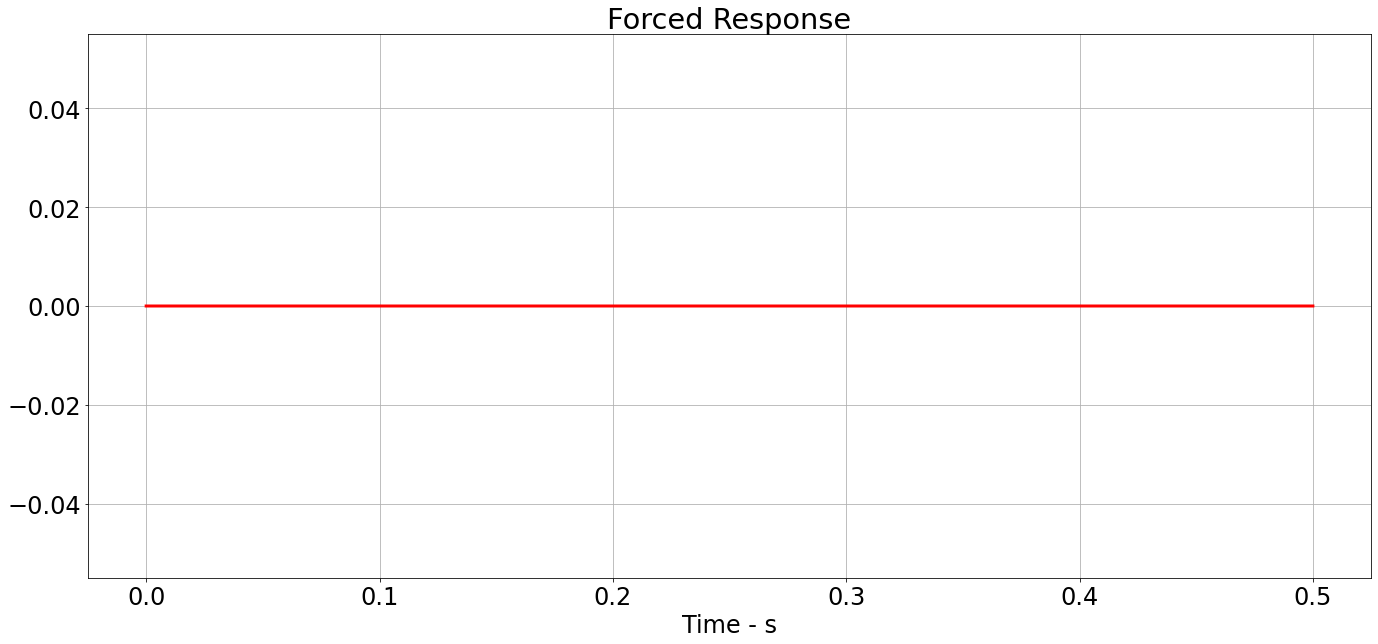

In [12]:
t = np.linspace(0, 0.5, 10000)  
t2,y2 = co.forced_response(H,t)
plt.title("Forced Response")
plt.xlabel('Time - s')
plt.plot(t2,y2,color='r',linewidth=3.)
plt.grid(True)

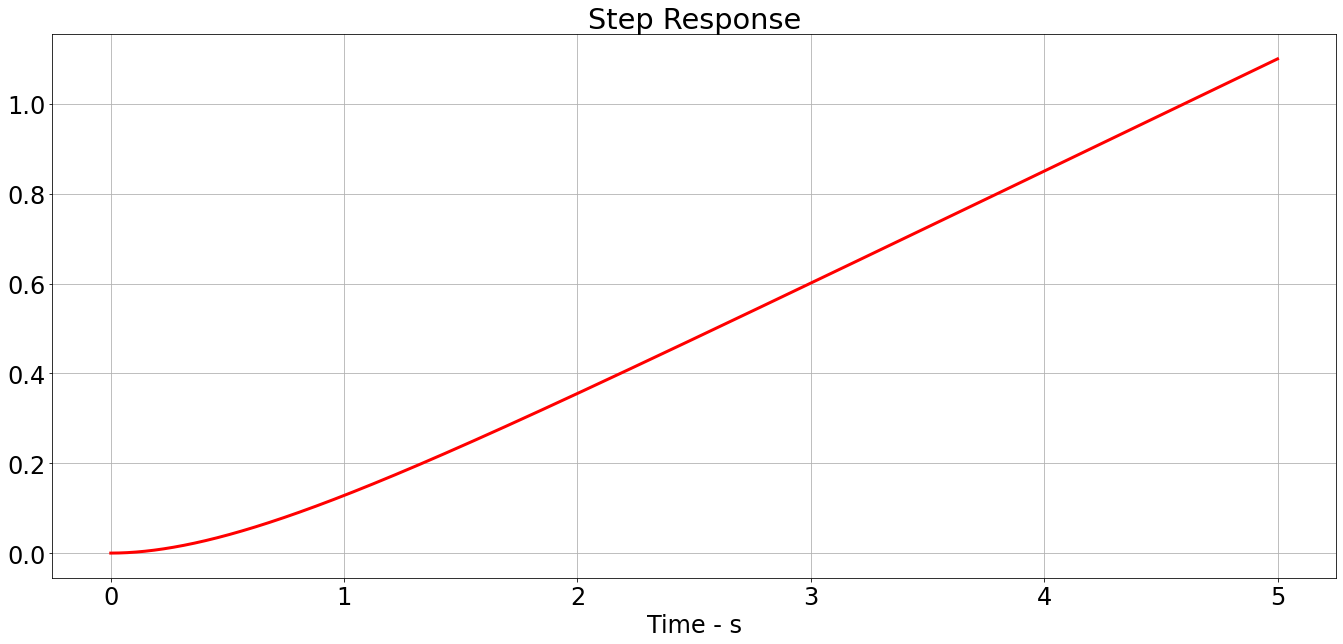

In [13]:
t = np.linspace(0, 5, 10000)  
t2,y2 = co.step_response(H,t)
plt.title("Step Response")
plt.xlabel('Time - s')
plt.plot(t2,y2,color='r',linewidth=3.)
plt.grid(True)

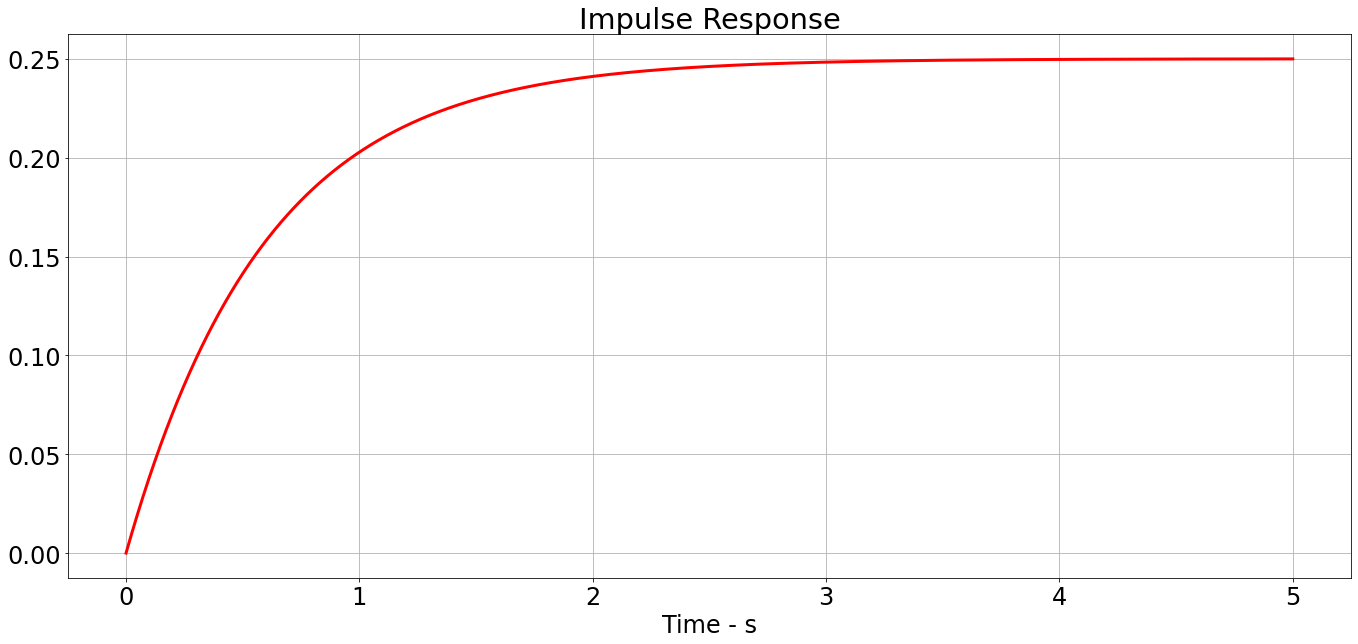

In [14]:
t = np.linspace(0, 5, 10000)  
t2,y2 = co.impulse_response(H,t)
plt.title("Impulse Response")
plt.xlabel('Time - s')
plt.plot(t2,y2,color='r',linewidth=3.)
plt.grid(True)

#### Pode-se analisar que para a resposta ao impulso, o sistema converge, e para a resposta ao degrau o sistema diverge, portanto, o sistema é dito instável. Alguns autores classificam a estabilidade de um sistema que se comporta dessa forma como instabilidade marginal.

[FONTE 1](http://www.fem.unicamp.br/~em621/aulas/aula5/IntConV_EstBIBO.pdf)

[FONTE 2](http://sites.poli.usp.br/d/PME2472/estabrela.pdf)

## <center>Diagrama de Bode<center>

#### Abaixo, pode-se analisar como o ganho e a fase do sistema se comportam com a frequência de entrada.

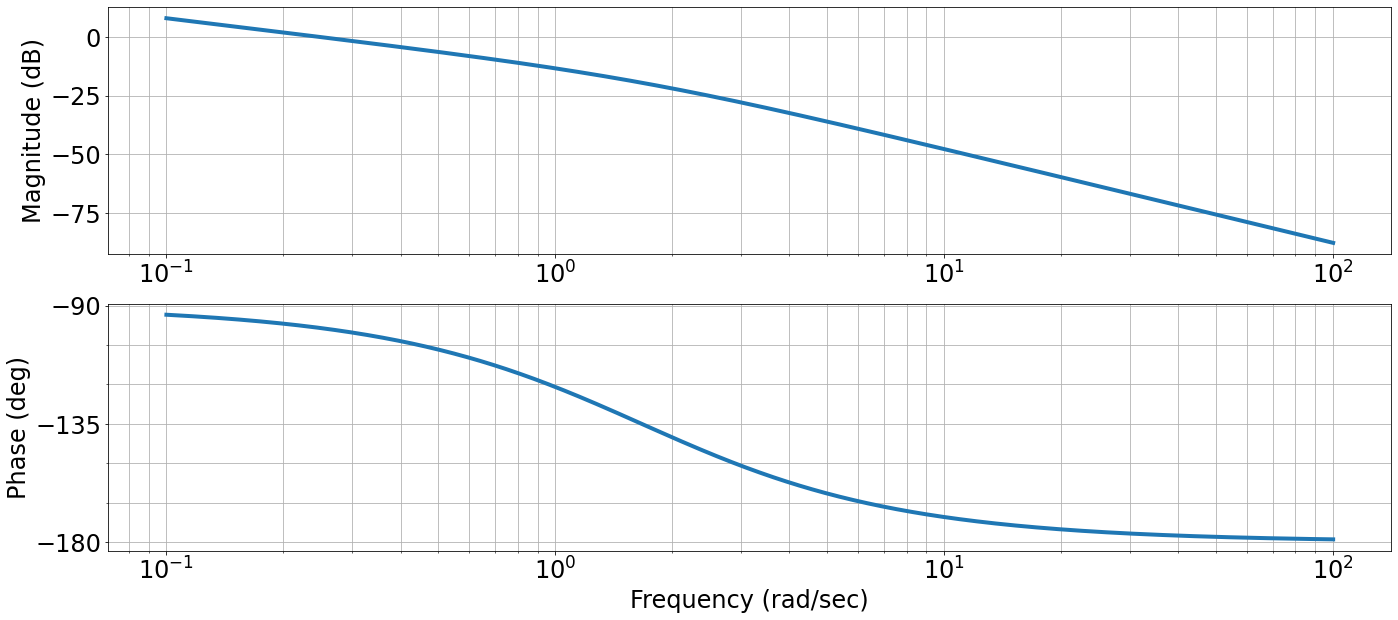

In [15]:
plt.title("Função de Transferência H1")
co.bode_plot(H,dB=True,linewidth=4.);